<a href="https://colab.research.google.com/github/Natalia9922/Employee-_classification_project/blob/main/Employee__classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treść zadania

# Jakie czynniki warunkują chęć pozostania pracownika u obecnego pracodawcy? Spróbuj przewidzieć, czy dany pracownik odejdzie z pracy, czy też nie.

Wyjaśnienie części danych:
**Education**
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'
**EnvironmentSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
**JobInvolvement**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
**JobSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
**PerformanceRating**
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'
**RelationshipSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
**WorkLifeBalance**
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

**EmployeeCount**
Ilość osób reprezentowanych przez dany wpis.
**Monthly Rate a Monthly income**
Monthly rate jest to koszt pracodawcy, jaki ponosi w związku z zatrudnieniem pracownika.
***DailyRate** analogicznie.
**Attrition**
Informacja czy dany pracownik odszedł z pracy, czy też nie.
***STOCK OPTIONS LEVEL***
Jaki procent akcji posiada/może posiadać pracownik.
***PERCENT SALARY HIKE***
Procentowy wzrost płacy w ciągu ostatnich 2 lat.

# Importing Libraries

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate


from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score

In [268]:
SEED = 123

# Loading Dataset

In [269]:
# defining a data frame
df_1 = pd.read_csv('/content/df_1.csv',index_col=0)
df_2 = pd.read_csv('/content/df_2.csv',index_col=0)
target = pd.read_csv('/content/target.csv',index_col=0)

# Exploratory Data Analysis (EDA)





In [270]:
df_1.head() # return the first 5 rows

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [271]:
df_2.head()  # return the first 5 rows

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0


In [272]:
target.head()  # return the first 5 rows

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [273]:
df = df_1.merge(df_2, on = "EmployeeNumber", how = "inner").merge(target, on = "EmployeeNumber", how = "inner")

In [274]:
df.head() # return the first 5 rows

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,No
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,No
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,No
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,No
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,No


In [275]:
df.tail() # return the last 5 rows

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Attrition
4297,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4298,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,95736.0,Yes
4299,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes
4300,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes
4301,7979,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,44496.0,Yes


In [276]:
df.shape

(4302, 36)

In [277]:
df.size

154872

In [278]:
df.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearlyIncome', 'Attrition'],
      dtype='object')

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4301
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole 

In [280]:
# checking missing values
df.isnull().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [281]:
# duplicate checking
df.duplicated().sum()

0

# Basic Data Cleaning

In [282]:
def annotate_plot(plots): # defining formats barplot
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

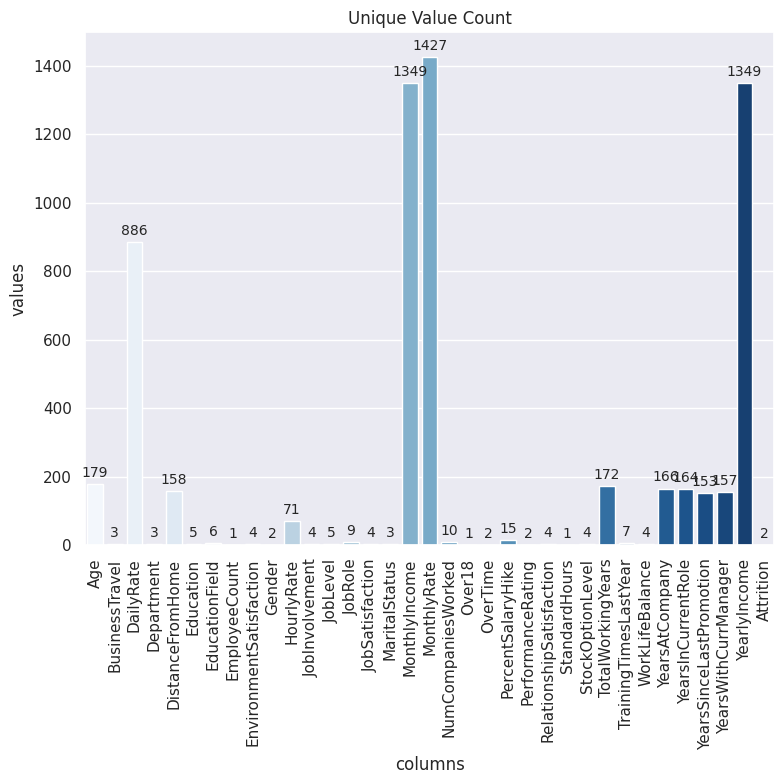

In [283]:
# creating a barplot of unique values and their quantity
plt.figure(figsize=(8,8))
unique_df = pd.DataFrame(df.apply(lambda x: x.nunique()))
unique_df.drop("EmployeeNumber",inplace =True)
unique_df = unique_df.reset_index()
unique_df.columns = ["columns","values"]
g = sns.barplot(x="columns",data = unique_df, y= "values", palette = 'Blues' )
annotate_plot(g)
plt.xticks(rotation=90)
plt.title("Unique Value Count")
plt.tight_layout()
plt.show()

Observation: remove columns with one value - StandardHours, Over18, EmployeeCount

In [284]:
# drop unnecessary column with one value and and not needed for modelling
df.drop(['StandardHours','Over18', 'EmployeeCount'],axis = 1,inplace = True)

# Data Visualization

Numerical columns:

In [285]:
num = df.select_dtypes(include=np.number).columns.tolist()

print('No. of numerical columns are:',len(num))

No. of numerical columns are: 25


Categorical columns:

In [286]:
cat = np.array(df.columns)[~np.isin(np.array(df.columns), num)]

print('No. of categorical columns are:',len(cat))

No. of categorical columns are: 8


## Exploring Categorical Columns/Features
 Checking the number of unique values for each text column

In [287]:
cat # categorical columns name

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Attrition'], dtype=object)

In [288]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3041
Travel_Frequently     816
Non-Travel            445
Name: BusinessTravel, dtype: int64

In [289]:
df['Department'].value_counts()

Research & Development    2815
Sales                     1305
Human Resources            182
Name: Department, dtype: int64

In [290]:
df['EducationField'].value_counts()

Life Sciences       1768
Medical             1344
Marketing            472
Technical Degree     393
Other                245
Human Resources       80
Name: EducationField, dtype: int64

In [291]:
df['Gender'].value_counts()

Male      2595
Female    1707
Name: Gender, dtype: int64

In [292]:
df['JobRole'].value_counts()

Sales Executive              950
Research Scientist           883
Laboratory Technician        755
Manufacturing Director       417
Healthcare Representative    384
Manager                      287
Sales Representative         247
Research Director            229
Human Resources              150
Name: JobRole, dtype: int64

In [293]:
df['MaritalStatus'].value_counts()

Married     2005
Single      1381
Divorced     916
Name: MaritalStatus, dtype: int64

In [294]:
df['OverTime'].value_counts()

No     3089
Yes    1213
Name: OverTime, dtype: int64

In [295]:
df['Attrition'].value_counts()

Yes    2222
No     2080
Name: Attrition, dtype: int64

## Exploring Numerical/Float variables

<ipython-input-296-332b5c3d1c38>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()


<Axes: >

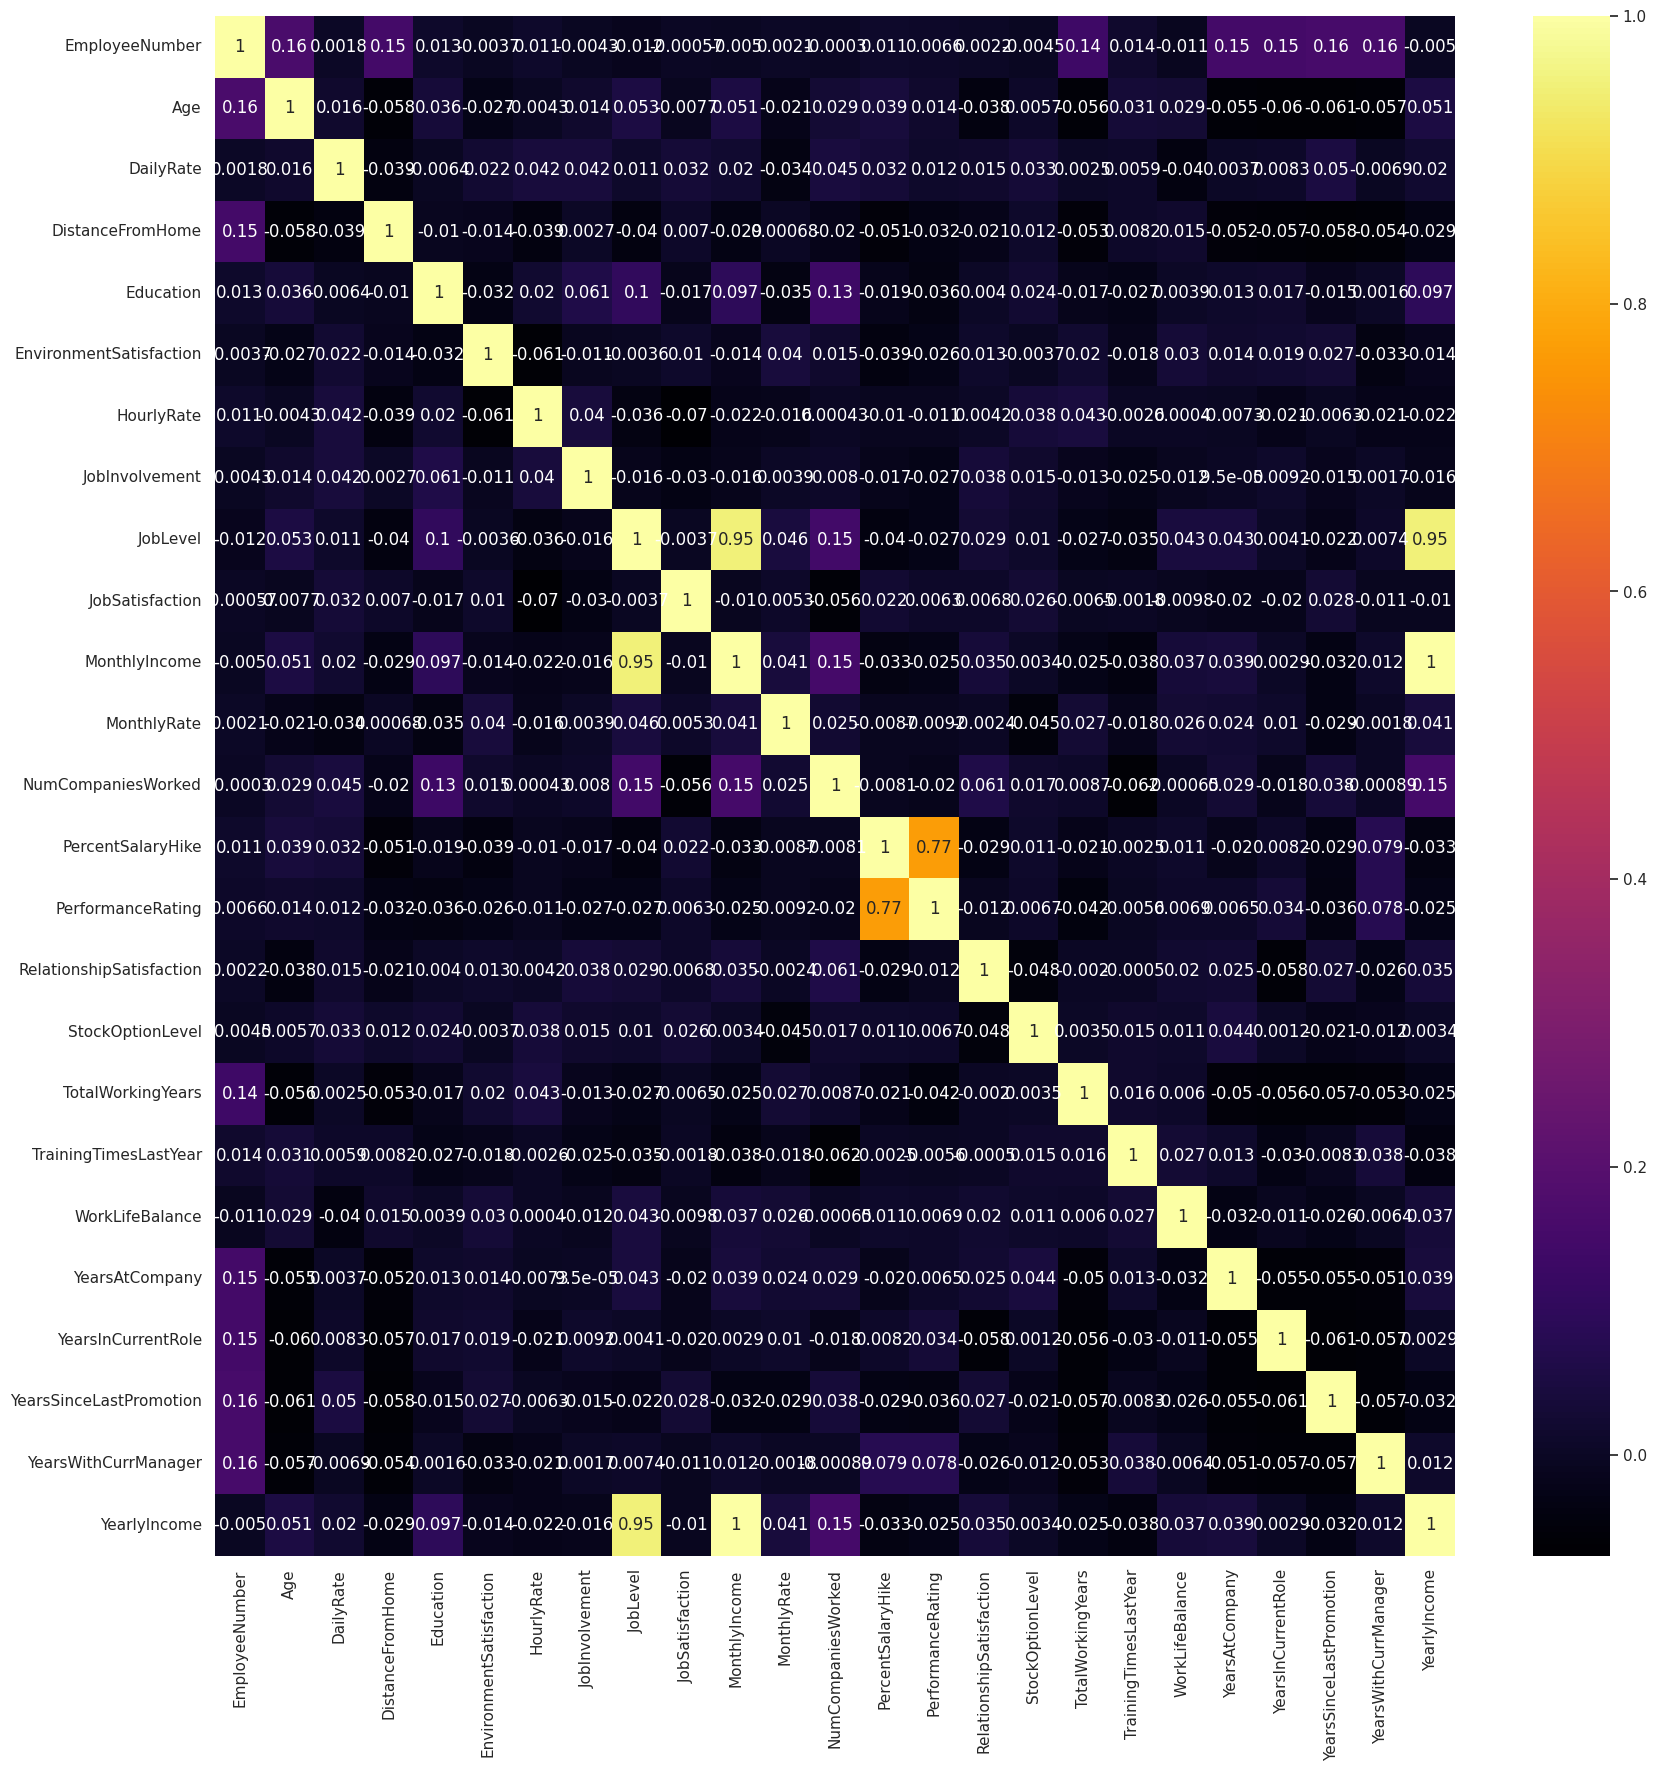

In [296]:
corr_df=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,annot=True,fmt='.2g',cmap='inferno')

Observation: Monthlycome and JobLevel is too correlated with the YearyIncome, so it needs to be removed

In [297]:
# drop too correlated columns
df.drop(['MonthlyIncome','JobLevel'],axis = 1,inplace = True)

In [298]:
# generate descriptive statistics
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,...,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,4809.243143,429.123199,800.843794,34478.313343,2.906788,2.719665,66.036495,2.741516,2.722920,14266.381450,...,2.725709,0.787773,354.004649,2.803347,2.765923,312.854719,367.109484,399.000930,334.767550,77439.202232
std,2643.040205,1591.153416,405.655763,147682.315767,1.026460,1.092333,20.298352,0.711379,1.106692,7154.584275,...,1.079747,0.849147,1508.016854,1.302586,0.708878,1373.999529,1480.107024,1597.939659,1431.991884,56075.927510
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,2094.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1680.250000,31.000000,457.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,7910.250000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000
50%,5828.500000,36.000000,804.000000,8.000000,3.000000,3.000000,66.000000,3.000000,3.000000,14174.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,6903.750000,45.000000,1162.000000,17.000000,4.000000,4.000000,84.000000,3.000000,4.000000,20471.000000,...,4.000000,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,99693.000000
max,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,4.000000,100.000000,4.000000,4.000000,26999.000000,...,4.000000,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


array([[<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>],
       [<Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'center': 'YearsAtComp

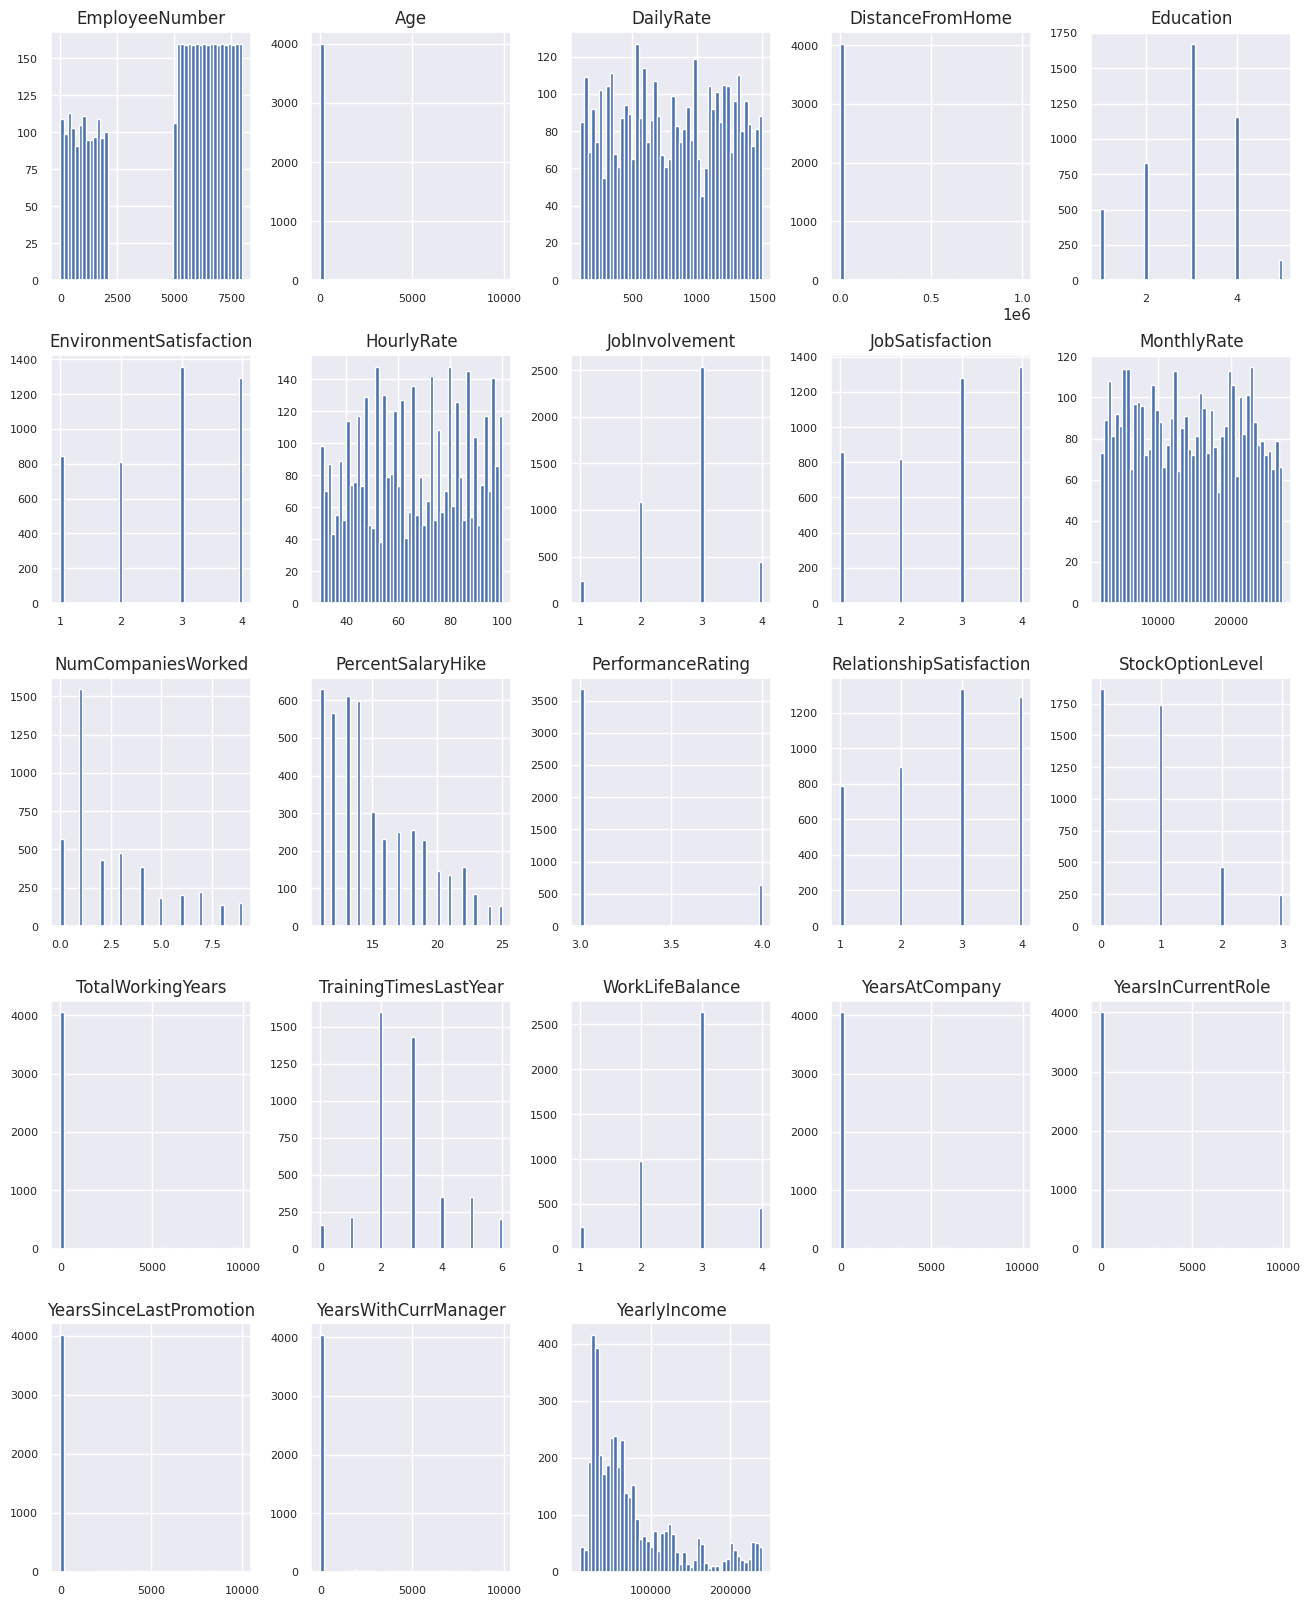

In [299]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Obseravtion: Age, DistanceFromHome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,YearsWithCurrManager have outliers

<Axes: xlabel='YearsSinceLastPromotion'>

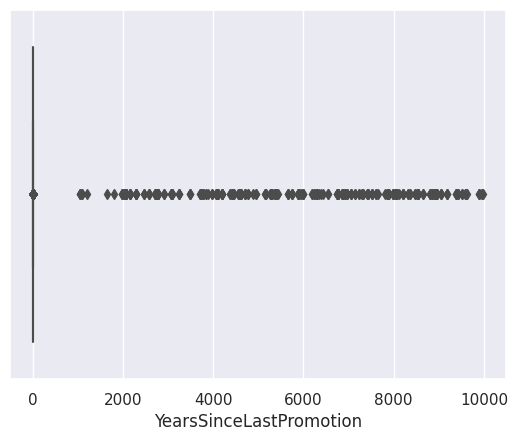

In [300]:
# checking the values for YearsSinceLastPromotion, more precisely
sns.boxplot(x=df["YearsSinceLastPromotion"])

Observation: outliers are begin around 1,000

<Axes: xlabel='YearsWithCurrManager'>

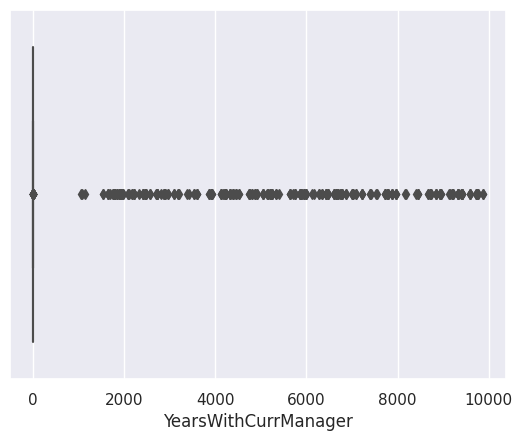

In [301]:
# checking the values for YearsWithCurrManager, more precisely
sns.boxplot(x=df["YearsWithCurrManager"])

Observation: outliers are begin around 1,000

<Axes: xlabel='DistanceFromHome'>

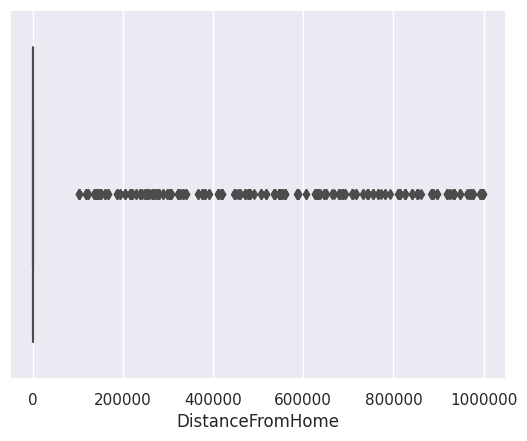

In [302]:
# checking the values for YearsWithCurrManager, more precisely
plt.ticklabel_format(style='plain')
sns.boxplot(x=df["DistanceFromHome"])

Observation: we assume that above 50 000 there are outliers



In [303]:
# disregarding outliers
df = df.loc[
    (df["Age"] < 90) # abstractly, we will note that you work until the age of 90
    & (df["TotalWorkingYears"] < 100)  # average working years is 40, we will add 10 years
    & (df["YearsAtCompany"] < 50) # abstractly, assume that someone worked in only one company
    & (df["YearsInCurrentRole"] < 50) # abstractly, we assume that someone only worked in one position
    & (df["YearsSinceLastPromotion"] < 50)
    & (df["YearsWithCurrManager"] < 50)
    & (df["DistanceFromHome"] < 50000)]

In [304]:
df_num = df[['EmployeeNumber',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'YearlyIncome']]

In [305]:
len(df_num. columns)

23

<ipython-input-306-a5300aef15e5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[df_num.columns[i*2+j]], ax=ax[i][j])
<ipython-input-306-a5300aef15e5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[df_num.columns[i*2+j]], ax=ax[i][j])
<ipython-input-306-a5300aef15e5>:7: UserWarn

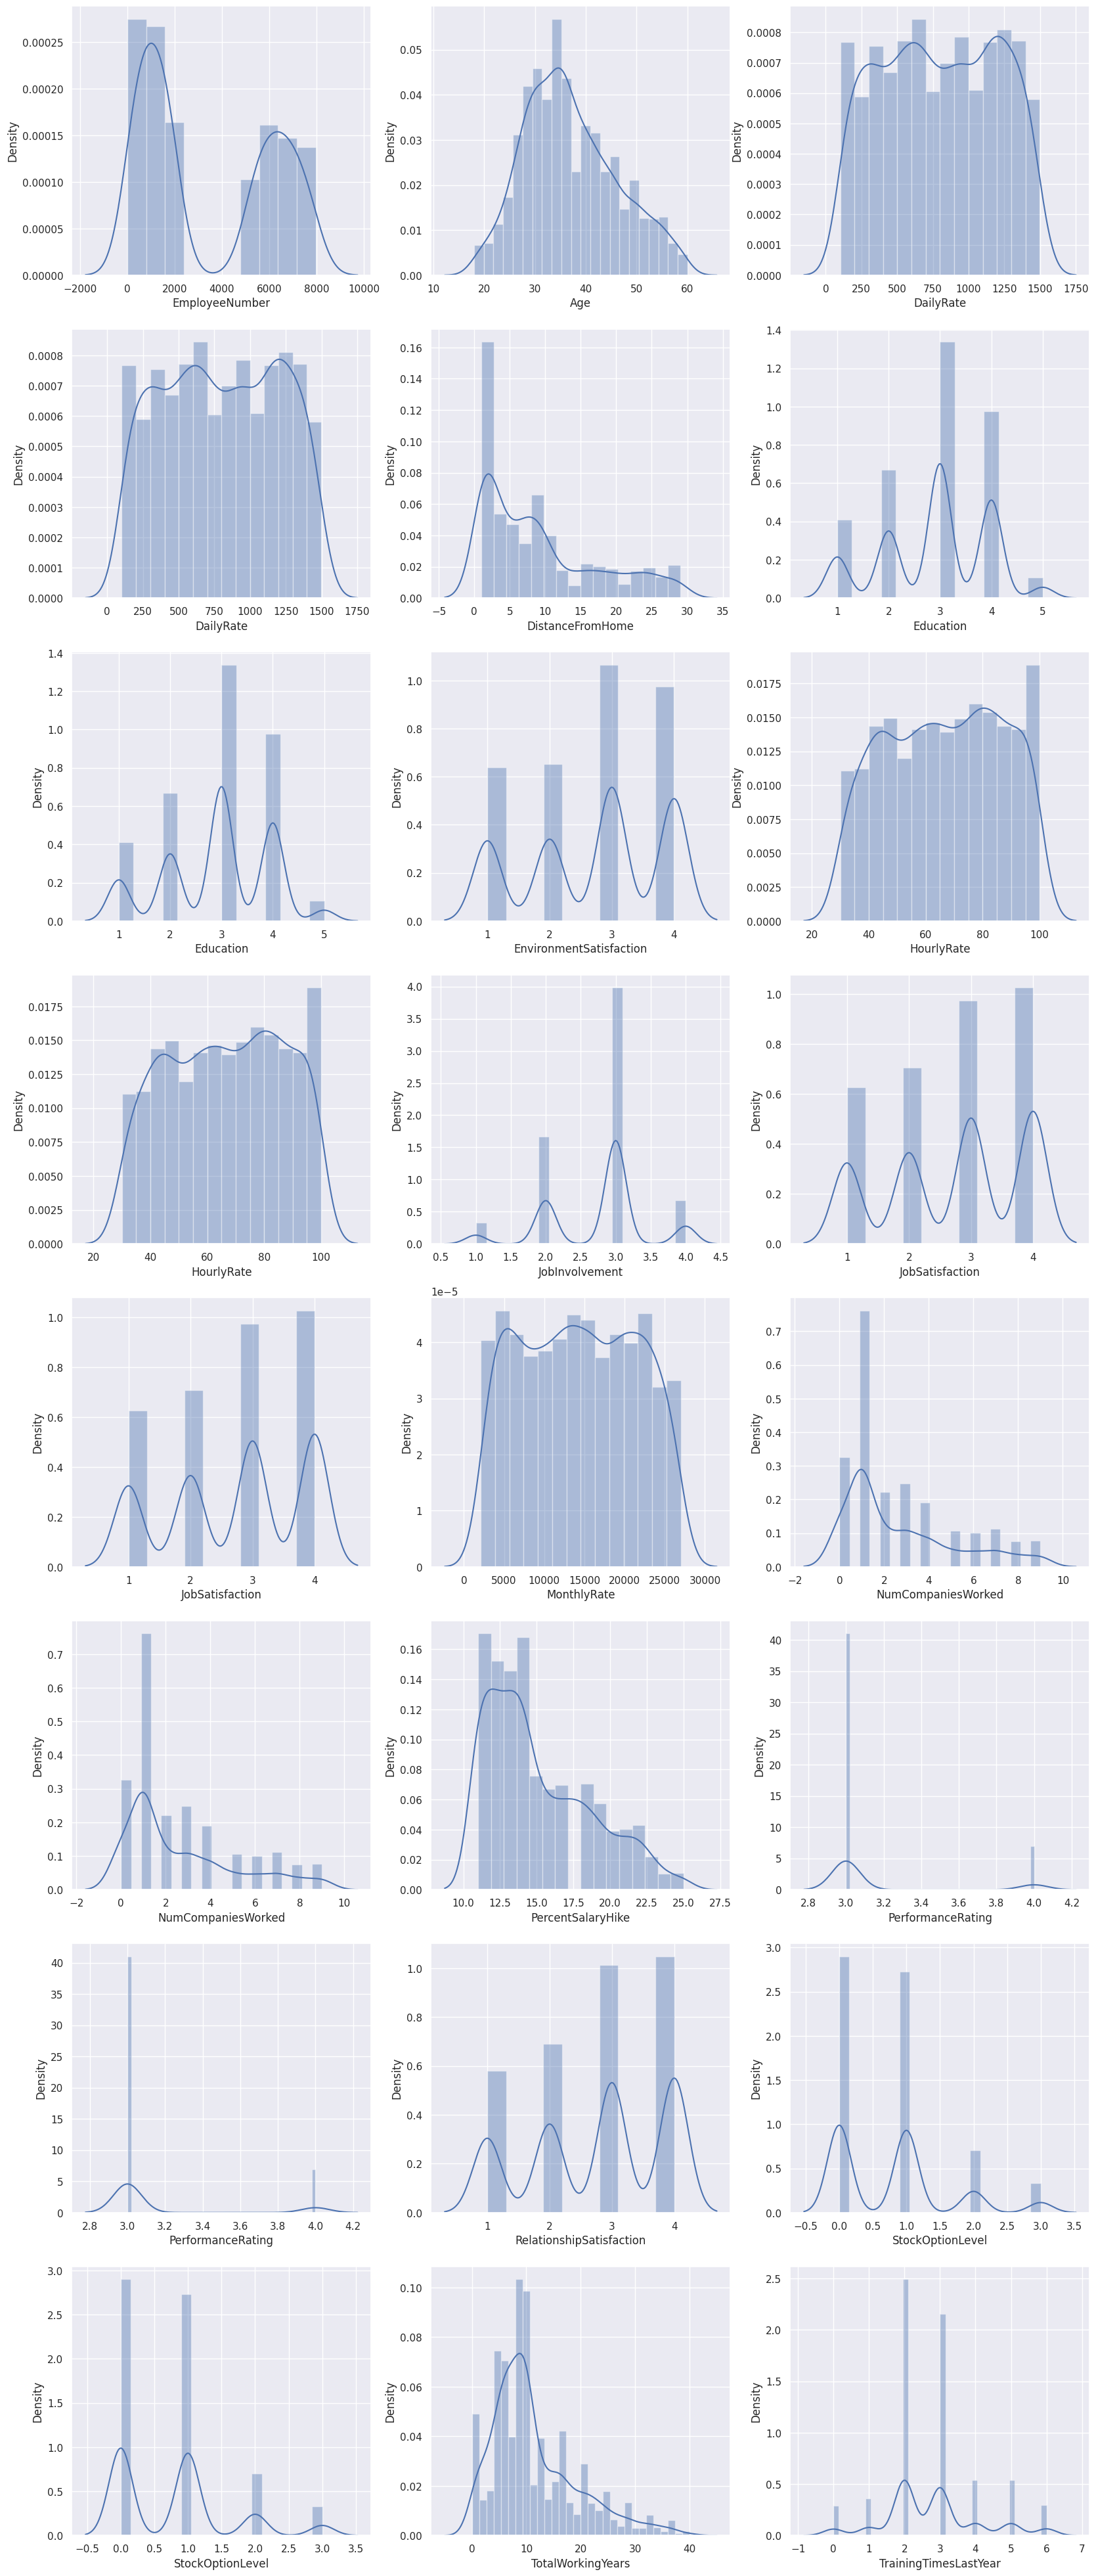

In [306]:
# checking the values after disregarding outliers

fig, ax = plt.subplots(8,3,figsize=(20, 50))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df_num[df_num.columns[i*2+j]], ax=ax[i][j])

# Data Preprocessing

In [307]:
#changing categorical target to numerical
target_map = {"No" : 0, "Yes" : 1}

df["Attrition"] = df["Attrition"].map(target_map)

In [308]:
df_dum = pd.get_dummies(df)

In [309]:
df_dum.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,104,30.0,852.0,1.0,1.0,4.0,55.0,2.0,4.0,15998.0,...,0,0,0,0,0,0,1,0,0,1
1,1638,38.0,397.0,2.0,2.0,4.0,54.0,2.0,3.0,14199.0,...,1,0,0,0,0,0,1,0,0,1
2,164,26.0,841.0,6.0,3.0,3.0,46.0,2.0,2.0,23300.0,...,0,0,1,0,0,0,1,0,1,0
3,395,28.0,1117.0,8.0,2.0,4.0,66.0,3.0,4.0,4488.0,...,0,0,1,0,0,0,0,1,1,0
4,53,35.0,464.0,4.0,2.0,3.0,75.0,3.0,4.0,10910.0,...,0,0,0,0,0,1,0,0,1,0


# Feature Scaling

In [310]:
df_dum.columns

Index(['EmployeeNumber', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearlyIncome',
       'Attrition', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'J

In [312]:
# prepare variable
y = df_dum['Attrition'] # the target variable
X = df_dum.drop("Attrition",axis = 1)  # the features excluding the target variable and unnecessary EmployeeNumber

In [313]:
# split data into train and test with an 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [314]:
# standardize features by removing the mean and scaling to unit variance
scaler = MinMaxScaler()
scaler.fit(X_train)
# scale test and train data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Evaluation metrics

In [338]:
def calculate_metrics(y_test, y_pred):
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_score_test = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy_test:0.4f}")
    print(f"Precision: {precision_test:0.4f}")
    print(f"Recall: {recall_test:0.4f}")
    print(f"F1-score: {f1_score_test:0.4f}")

## Logistic Regression

In [334]:
model = LogisticRegression(random_state = SEED, max_iter = 100)
# model teaching
model.fit(X_train_scaled, y_train)

tsh = 0.5 # threshold line

# prediction
y_scores = model.predict_proba(X_test_scaled)

y_pred_lr = np.where(y_scores[:, 1] > tsh, 1, 0)

[]

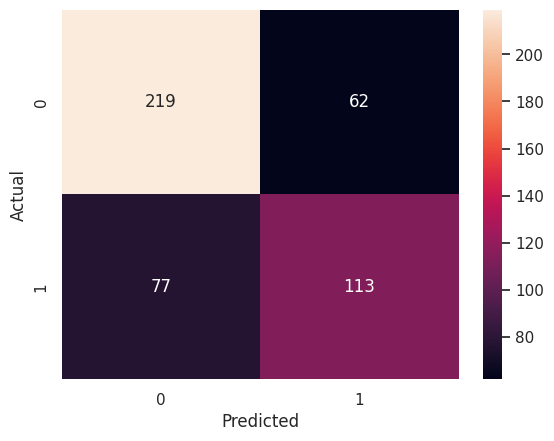

In [332]:
plt.ticklabel_format(style='plain')
cm_plot = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot = True, fmt='g') #heatmapa dla wyników
cm_plot.set(xlabel = "Predicted", ylabel = "Actual")
cm_plot.plot()

## Support Vectors Machines (SVM)

In [342]:
model = SVC(kernel = "poly", degree = 10)
# model teaching
model.fit(X_train_scaled, y_train)

# prediction
y_pred_SVM = model.predict(X_test_scaled)
y_train_SVM = model.predict(X_train_scaled)

In [343]:
calculate_metrics(y_train, y_train_SVM)

Accuracy: 0.9324
Precision: 0.8877
Recall: 0.9412
F1-score: 0.9137


In [344]:
calculate_metrics(y_test, y_pred_SVM)

Accuracy: 0.6858
Precision: 0.6193
Recall: 0.5737
F1-score: 0.5956


## KNeighbors Classifier

Text(0, 0.5, 'TotalWorkingYears')

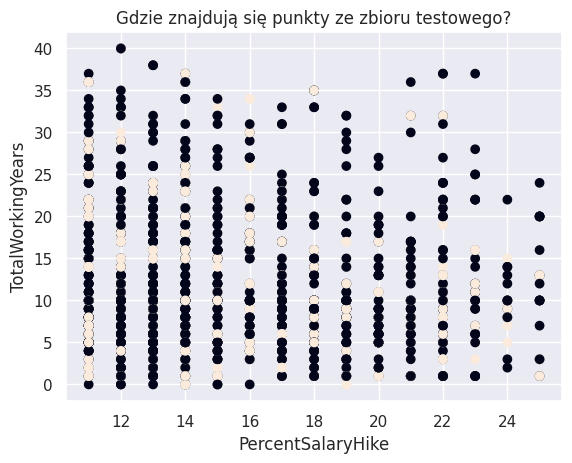

In [349]:
knn = KNeighborsClassifier(n_neighbors = 3, metric="euclidean")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x = X_train["PercentSalaryHike"], y = X_train["TotalWorkingYears"], c = y_train)
ax.scatter(x = X_test["PercentSalaryHike"], y = X_test["TotalWorkingYears"], c = y_pred)

ax.set_title("XXX")
ax.set_xlabel("PercentSalaryHike")
ax.set_ylabel("TotalWorkingYears")